<a href="https://colab.research.google.com/github/bharathts1507/TSAI-Assignments-EVA4/blob/master/Session10_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# mount the drive to access libraries and supportive classes
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
import sys
sys.path.append('/content/drive/My Drive/TSAI_EVA4/Assignment10')

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
from training import *
from torchsummary import summary

# getting the data
trainloader, testloader, testData, classes = getData()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


In [7]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


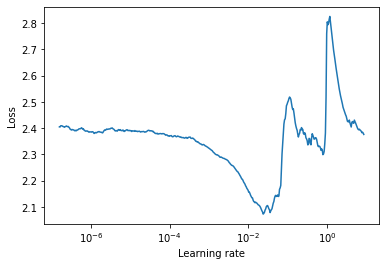

In [8]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=500)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [9]:
# Training starts here
Training(35,model,device, trainloader, testloader )

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.4479572772979736 Batch_id=390 Accuracy=39.11: 100%|██████████| 391/391 [00:55<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.4424, Accuracy: 4799/10000 (47.99%)

EPOCH: 1


Loss=1.172974944114685 Batch_id=390 Accuracy=56.93: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.1480, Accuracy: 6496/10000 (64.96%)

EPOCH: 2


Loss=0.7693220973014832 Batch_id=390 Accuracy=68.21: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.1560, Accuracy: 7165/10000 (71.65%)

EPOCH: 3


Loss=0.7849079966545105 Batch_id=390 Accuracy=74.57: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.1616, Accuracy: 7553/10000 (75.53%)

EPOCH: 4


Loss=0.48805856704711914 Batch_id=390 Accuracy=78.70: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.1151, Accuracy: 7926/10000 (79.26%)

EPOCH: 5


Loss=0.5493402481079102 Batch_id=390 Accuracy=80.96: 100%|██████████| 391/391 [00:56<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.7369, Accuracy: 7821/10000 (78.21%)

EPOCH: 6


Loss=0.6751657128334045 Batch_id=390 Accuracy=83.41: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.4863, Accuracy: 8096/10000 (80.96%)

EPOCH: 7


Loss=0.5991042852401733 Batch_id=390 Accuracy=85.52: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.1205, Accuracy: 8098/10000 (80.98%)

EPOCH: 8


Loss=0.5654819011688232 Batch_id=390 Accuracy=86.87: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.9117, Accuracy: 8341/10000 (83.41%)

EPOCH: 9


Loss=0.3656894564628601 Batch_id=390 Accuracy=87.97: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.6514, Accuracy: 8360/10000 (83.60%)

EPOCH: 10


Loss=0.3942659795284271 Batch_id=390 Accuracy=88.96: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.6775, Accuracy: 8512/10000 (85.12%)

EPOCH: 11


Loss=0.2350483387708664 Batch_id=390 Accuracy=89.85: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.8070, Accuracy: 8523/10000 (85.23%)

EPOCH: 12


Loss=0.3764401078224182 Batch_id=390 Accuracy=90.82: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.5536, Accuracy: 8538/10000 (85.38%)

EPOCH: 13


Loss=0.3220295310020447 Batch_id=390 Accuracy=91.68: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.7159, Accuracy: 8496/10000 (84.96%)

EPOCH: 14


Loss=0.23867669701576233 Batch_id=390 Accuracy=91.97: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.8275, Accuracy: 8570/10000 (85.70%)

EPOCH: 15


Loss=0.21051673591136932 Batch_id=390 Accuracy=92.74: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.6229, Accuracy: 8671/10000 (86.71%)

EPOCH: 16


Loss=0.27241000533103943 Batch_id=390 Accuracy=93.22: 100%|██████████| 391/391 [00:56<00:00,  6.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.2113, Accuracy: 8610/10000 (86.10%)

EPOCH: 17


Loss=0.20372632145881653 Batch_id=390 Accuracy=93.29: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.1044, Accuracy: 8704/10000 (87.04%)

EPOCH: 18


Loss=0.12048351764678955 Batch_id=390 Accuracy=93.73: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.0396, Accuracy: 8629/10000 (86.29%)

EPOCH: 19


Loss=0.27053821086883545 Batch_id=390 Accuracy=94.18: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.2882, Accuracy: 8733/10000 (87.33%)

EPOCH: 20


Loss=0.16785769164562225 Batch_id=390 Accuracy=94.39: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.5471, Accuracy: 8740/10000 (87.40%)

EPOCH: 21


Loss=0.12211453914642334 Batch_id=390 Accuracy=94.82: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.2041, Accuracy: 8761/10000 (87.61%)

EPOCH: 22


Loss=0.20046360790729523 Batch_id=390 Accuracy=94.84: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.1602, Accuracy: 8831/10000 (88.31%)

EPOCH: 23


Loss=0.06609878689050674 Batch_id=390 Accuracy=95.22: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.7479, Accuracy: 8792/10000 (87.92%)

EPOCH: 24


Loss=0.18756535649299622 Batch_id=390 Accuracy=95.28: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.5092, Accuracy: 8864/10000 (88.64%)

EPOCH: 25


Loss=0.21418264508247375 Batch_id=390 Accuracy=95.32: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.3223, Accuracy: 8785/10000 (87.85%)

EPOCH: 26


Loss=0.15969665348529816 Batch_id=390 Accuracy=95.50: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.3428, Accuracy: 8886/10000 (88.86%)

EPOCH: 27


Loss=0.1238640695810318 Batch_id=390 Accuracy=96.01: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.4067, Accuracy: 8906/10000 (89.06%)

EPOCH: 28


Loss=0.13390153646469116 Batch_id=390 Accuracy=96.12: 100%|██████████| 391/391 [00:56<00:00,  6.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.6212, Accuracy: 8811/10000 (88.11%)

EPOCH: 29


Loss=0.27345430850982666 Batch_id=390 Accuracy=95.92: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.1914, Accuracy: 8881/10000 (88.81%)

EPOCH: 30


Loss=0.09677116572856903 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.1987, Accuracy: 8894/10000 (88.94%)

EPOCH: 31


Loss=0.06013917922973633 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.0434, Accuracy: 8911/10000 (89.11%)

EPOCH: 32


Loss=0.09996439516544342 Batch_id=390 Accuracy=96.48: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.0951, Accuracy: 8755/10000 (87.55%)

EPOCH: 33


Loss=0.08716833591461182 Batch_id=390 Accuracy=96.36: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.2472, Accuracy: 8942/10000 (89.42%)

EPOCH: 34


Loss=0.07426445186138153 Batch_id=390 Accuracy=96.68: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]



Test set: Average loss: -14.8112, Accuracy: 8864/10000 (88.64%)



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


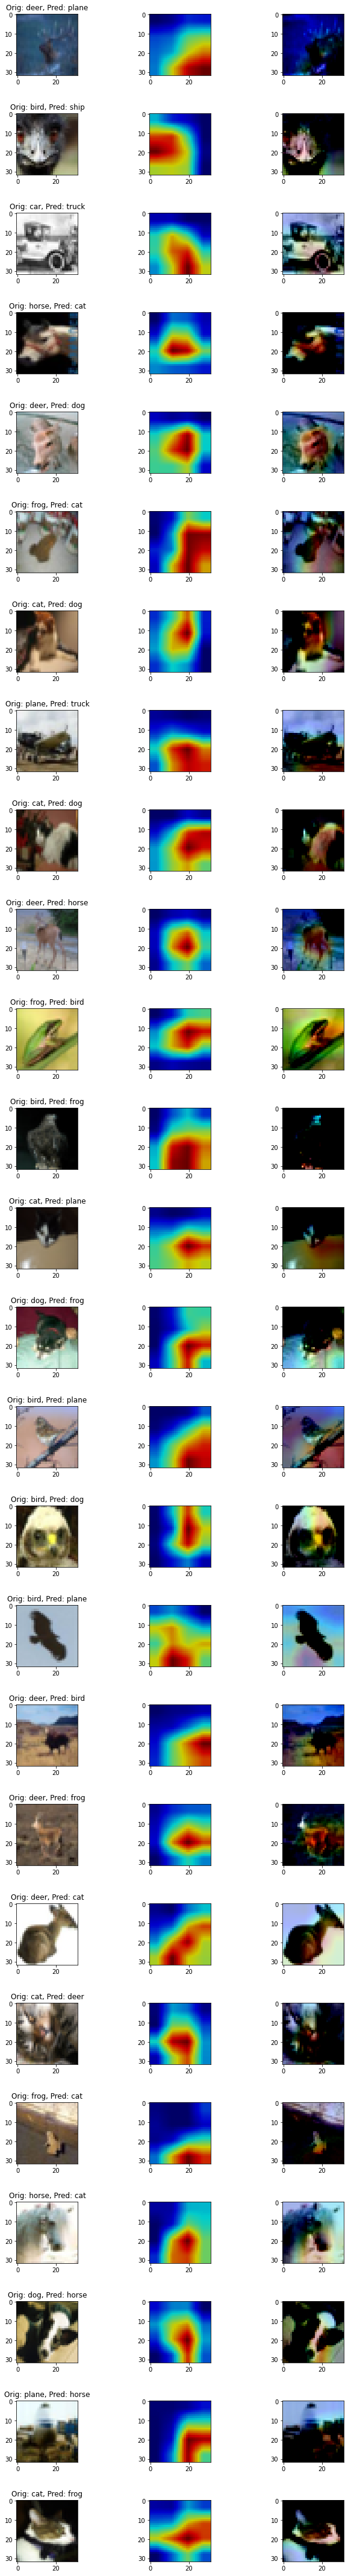

In [10]:
MissClassifedImage(testData,model,device,26,classes)

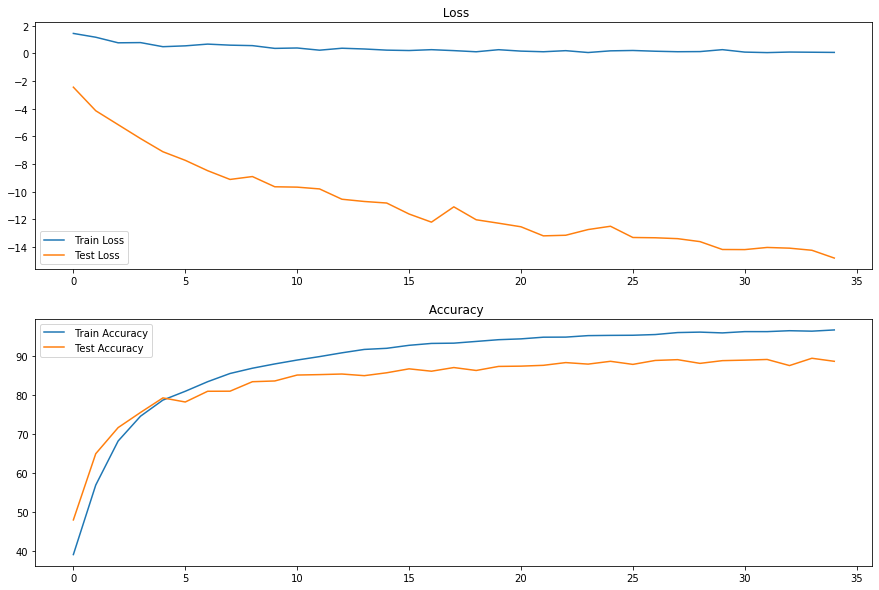

In [11]:
plotPerformanceGraph( ) 